# **Proyek Akhir Dicoding : Membuat Model NLP dengan TensorFlow**

* Nama : Ayu Kirana Vijayanti Indarto
* Email: ayukiranav136@gmail.com
* Dicoding ID: ayukv136
* Linkedin: https://www.linkedin.com/in/ayukiranav136

Proyek ini merupakan proyek untuk membuat model Natural Language Processing (NLP) menggunakan Tensorflow.





## Mengunduh dataset dari Kaggle

In [1]:
# install package dengan pip dan upload file json
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ayukiranav136","key":"c351a23116c723769bce2fc46a6b3d03"}'}

In [2]:
# membuat directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
# unduh dataset
!kaggle datasets download -d sunilthite/text-document-classification-dataset

  0% 0.00/1.85M [00:00<?, ?B/s]
100% 1.85M/1.85M [00:00<00:00, 109MB/s]


In [4]:
# unzip dataset
!mkdir text-document-classification-dataset
!unzip text-document-classification-dataset.zip -d text-document-classification-dataset
!ls text-document-classification-dataset

Archive:  text-document-classification-dataset.zip
  inflating: text-document-classification-dataset/df_file.csv  
df_file.csv


# Membaca dataset dan visualisasi data

Import library

In [5]:
# import library

# dataframe
import numpy as np
import pandas as pd

# visualisasi plot
import seaborn as sns
import matplotlib.pyplot as plt

# split data
from sklearn.model_selection import train_test_split

#stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# preprocessing dan layer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
# import dataset
df = pd.read_csv('text-document-classification-dataset/df_file.csv')

In [7]:
# cek 1000 data teratas
df.head(1000)

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0
...,...,...
995,Junk e-mails on relentless rise\n \n Spam traf...,2
996,Warning over tsunami aid website\n \n Net user...,2
997,Peer-to-peer nets 'here to stay'\n \n Peer-to-...,2
998,Latest Opera browser gets vocal\n \n Net brows...,2


# Cek dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2225 non-null   object
 1   Label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB


Cek missing value

In [9]:
df.isnull().values.any()

False

Menghitung value label

In [10]:
df['Label'].value_counts()

1    511
4    510
0    417
2    401
3    386
Name: Label, dtype: int64

Mengganti nama label

In [11]:
category = pd.get_dummies(df.Label)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(['Label'], axis=1)
new_df

,Text,0,1,2,3,4
0,Budget to set scene for election\n \n Gordon B...,1,0,0,0,0
1,Army chiefs in regiments decision\n \n Militar...,1,0,0,0,0
2,Howard denies split over ID cards\n \n Michael...,1,0,0,0,0
3,Observers to monitor UK election\n \n Minister...,1,0,0,0,0
4,Kilroy names election seat target\n \n Ex-chat...,1,0,0,0,0
...,...,...,...,...,...,...
2220,India opens skies to competition\n \n India wi...,0,0,0,0,1
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...,0,0,0,0,1
2222,Survey confirms property slowdown\n \n Governm...,0,0,0,0,1
2223,High fuel prices hit BA's profits\n \n British...,0,0,0,0,1


Keterangan label
* Politics = 0
* Sport = 1
* Technology = 2
* Entertainment =3
* Business = 4







In [12]:
new_df.rename(columns = {0 :"Politics", 1 : "Sport", 2 : "Technology", 3 : "Entertainment", 4 : "Business"}, inplace=True)

Mengubah tipe data text

In [13]:
text = new_df['Text'].astype(str)
label = new_df[['Politics', 'Sport', 'Technology', 'Entertainment', 'Business']].values

# Split data training dan data validasi

Setiap direktori yang ada dipecah menjadi data training dan data validasi, dengan data validasi sebesar 20% dari total dataset.

In [14]:
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2)

# Melakukan Tokenizing, Sequencing, dan Padding

In [15]:
tokenizer = Tokenizer(num_words=5000, oov_token='x', filters='!"#$%&()*+,-./:;<=>@[\]^_`{|}~')
tokenizer.fit_on_texts(text_train)
tokenizer.fit_on_texts(text_test)

seq_train = tokenizer.texts_to_sequences(text_train)
seq_test = tokenizer.texts_to_sequences(text_test)

padded_train = pad_sequences(seq_train)
padded_test = pad_sequences(seq_test)

Membuat model menggunakan sequential model

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [19]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [20]:
# Penggunaan Callback mencegah overfitting dan menghentikan training setelah akurasi terpenuhi
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.75):
      print("\nAkurasi di atas 90%, hentikan training!")
      self.model.stop_training = True

# Utilize callback function
callbacks = myCallback()

Melatih model

In [21]:
num_epochs = 30
history = model.fit(padded_train, label_train, epochs=num_epochs,
    validation_data=(padded_test, label_test), verbose=2,
    callbacks=[callbacks]
)

Epoch 1/30
56/56 - 167s - loss: 1.6067 - accuracy: 0.2213 - val_loss: 1.5926 - val_accuracy: 0.2360 - 167s/epoch - 3s/step
Epoch 2/30
56/56 - 160s - loss: 1.4910 - accuracy: 0.3191 - val_loss: 1.1991 - val_accuracy: 0.4202 - 160s/epoch - 3s/step
Epoch 3/30
56/56 - 159s - loss: 1.1369 - accuracy: 0.4612 - val_loss: 1.0795 - val_accuracy: 0.4899 - 159s/epoch - 3s/step
Epoch 4/30
56/56 - 160s - loss: 0.8545 - accuracy: 0.5978 - val_loss: 1.0807 - val_accuracy: 0.5236 - 160s/epoch - 3s/step
Epoch 5/30
56/56 - 161s - loss: 0.6738 - accuracy: 0.6882 - val_loss: 1.0252 - val_accuracy: 0.5798 - 161s/epoch - 3s/step
Epoch 6/30
56/56 - 159s - loss: 0.5438 - accuracy: 0.7236 - val_loss: 1.0370 - val_accuracy: 0.6270 - 159s/epoch - 3s/step
Epoch 7/30
56/56 - 162s - loss: 0.4392 - accuracy: 0.7657 - val_loss: 1.1255 - val_accuracy: 0.6180 - 162s/epoch - 3s/step
Epoch 8/30
56/56 - 159s - loss: 0.3727 - accuracy: 0.7719 - val_loss: 1.2202 - val_accuracy: 0.6404 - 159s/epoch - 3s/step
Epoch 9/30
56/56

Membuat Model Akurasi

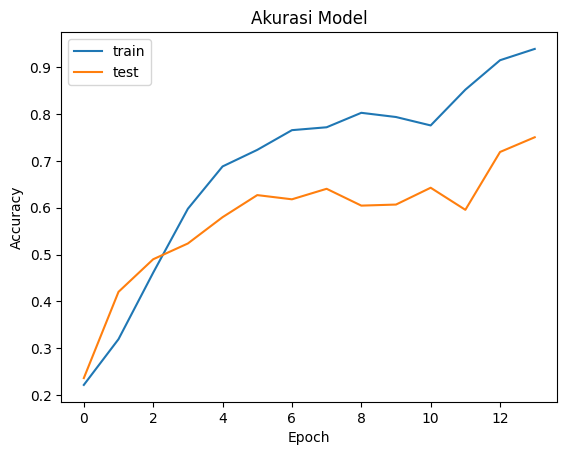

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

Membuat Model Loss

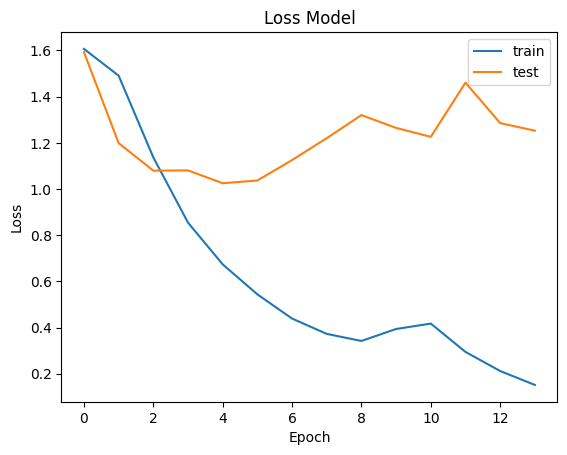

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'],loc='upper right')
plt.show()